In [1]:
from simulator import HathorSimulator, Miner, TxGenerator
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
sim = HathorSimulator(block_weight=20.30)

m0 = Miner(hashpower=10000)
sim.add_miner(m0)

g1 = TxGenerator(tx_lambda=1./(30*60), hashpower=10000)
sim.add_tx_generator(g1)

[        0.00] min weight updated: w_blk=22.8850 w_tx=  -inf


In [3]:
sim.run(3600*24*30, report_interval=3600*24)
print(len(sim.blocks), len(sim.transactions))

[     6459.99] min weight updated: w_blk=22.8850 w_tx=6.3427
[    10228.20] min weight updated: w_blk=22.8850 w_tx=6.1203
[    14233.47] min weight updated: w_blk=22.8850 w_tx=5.0323
[    17848.88] min weight updated: w_blk=22.8850 w_tx=6.7650
[    22317.69] min weight updated: w_blk=22.8850 w_tx=6.8743
[    27473.64] min weight updated: w_blk=22.8850 w_tx=4.6680
[    31458.51] min weight updated: w_blk=22.8850 w_tx=6.6246
[    36873.10] min weight updated: w_blk=22.8850 w_tx=6.9193
[    40654.73] min weight updated: w_blk=22.8850 w_tx=7.1152
[    46155.57] min weight updated: w_blk=22.8850 w_tx=5.5746
[    53416.55] min weight updated: w_blk=22.8850 w_tx=4.1741
[    57228.07] min weight updated: w_blk=22.8850 w_tx=6.6888
[    62582.67] min weight updated: w_blk=22.8850 w_tx=6.6134
[    67503.04] min weight updated: w_blk=22.8850 w_tx=6.3204
[    73246.98] min weight updated: w_blk=22.8850 w_tx=6.5122
[    77856.87] min weight updated: w_blk=22.8850 w_tx=7.4144
[    82511.19] min weigh

[  1170739.77] min weight updated: w_blk=22.8144 w_tx=4.0877
[  1175430.87] min weight updated: w_blk=22.8144 w_tx=6.8043
[  1179263.70] min weight updated: w_blk=22.8144 w_tx=6.0958
[  1183599.20] min weight updated: w_blk=22.8144 w_tx=7.7254
[  1190122.10] min weight updated: w_blk=22.8144 w_tx=5.9137
[  1198682.24] min weight updated: w_blk=22.8144 w_tx=5.5215
[  1203433.01] min weight updated: w_blk=22.8144 w_tx=6.7861
[  1209039.60] min weight updated: w_blk=22.8144 w_tx=7.5471
  0.42 [  1211463.48] blocks=9386 txs=703 tips=0
[  1214582.69] min weight updated: w_blk=22.8144 w_tx=6.1485
[  1219282.17] min weight updated: w_blk=22.8144 w_tx=6.3867
[  1229607.57] min weight updated: w_blk=22.8144 w_tx=5.6661
[  1235621.25] min weight updated: w_blk=22.8144 w_tx=6.7679
[  1242214.39] min weight updated: w_blk=22.8144 w_tx=5.8982
[  1247872.09] min weight updated: w_blk=22.8144 w_tx=6.1190
[  1253568.09] min weight updated: w_blk=22.8144 w_tx=6.1092
[  1258001.35] min weight updated: w

[  2391204.46] min weight updated: w_blk=22.8727 w_tx=4.9742
[  2394939.94] min weight updated: w_blk=22.8727 w_tx=6.1329
[  2400316.31] min weight updated: w_blk=22.8727 w_tx=6.6076
[  2404408.35] min weight updated: w_blk=22.8727 w_tx=7.0014
[  2408754.61] min weight updated: w_blk=22.8727 w_tx=6.4994
[  2415264.02] min weight updated: w_blk=22.8727 w_tx=5.9167
[  2420021.11] min weight updated: w_blk=22.8727 w_tx=6.3691
  0.83 [  2421842.16] blocks=18907 txs=1412 tips=0
[  2428682.06] min weight updated: w_blk=22.8727 w_tx=3.9197
[  2434598.33] min weight updated: w_blk=22.8727 w_tx=6.4695
[  2439117.78] min weight updated: w_blk=22.8727 w_tx=5.8581
[  2442915.31] min weight updated: w_blk=22.8727 w_tx=6.6941
[  2451223.00] min weight updated: w_blk=22.8727 w_tx=5.5647
[  2457907.48] min weight updated: w_blk=22.8727 w_tx=5.8784
[  2461976.55] min weight updated: w_blk=22.8727 w_tx=6.0095
[  2466773.49] min weight updated: w_blk=22.8727 w_tx=4.7721
[  2476381.55] min weight updated:

In [4]:
print(sim.min_weight_confirmed)

22.8688536877


In [5]:
nodes = sim.transactions + sim.blocks
nodes.sort(key=lambda x: x.time)

In [6]:
v = [tx.extras['confirmed_time'] - tx.time for tx in nodes if tx.type == 'tx' and 'confirmed_time' in tx.extras]

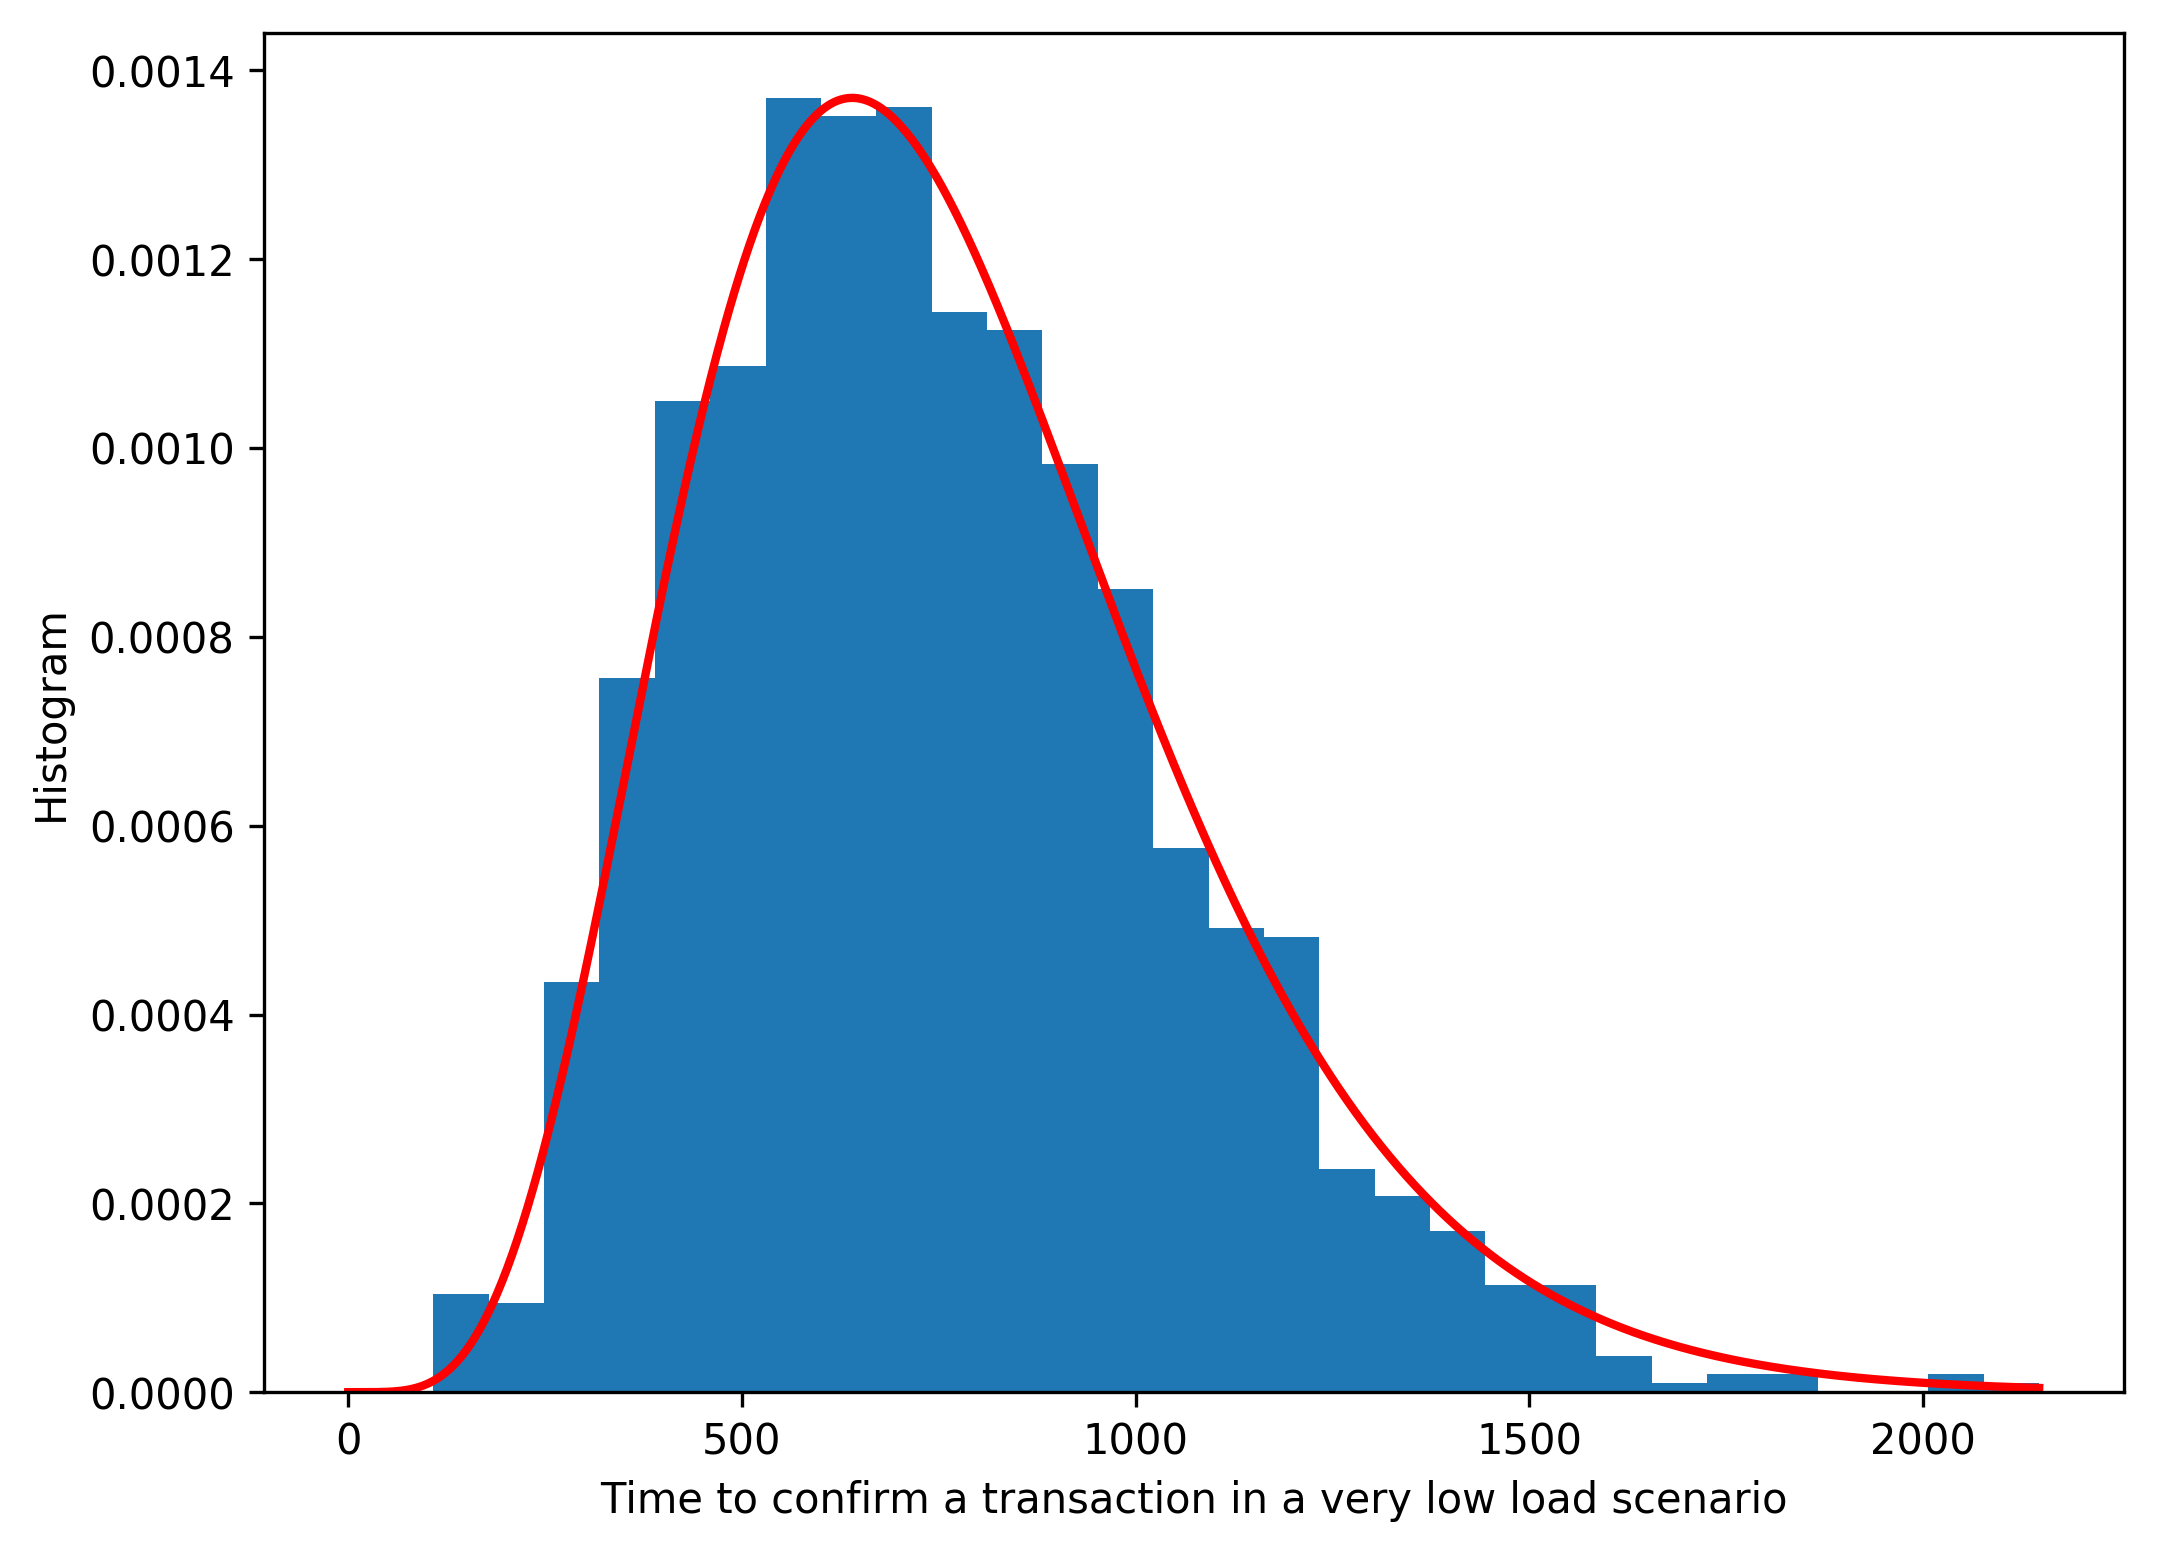

In [7]:
plt.figure(figsize=(8, 6), dpi=300)
plt.hist(v, bins='fd', density=True);

x = np.linspace(0, max(v), 1000)
y = scipy.stats.erlang.pdf(x, 6, 0, 128)
plt.plot(x, y, 'r', linewidth=2);

plt.ylabel('Histogram')
plt.xlabel('Time to confirm a transaction in a very low load scenario');

In [ ]:
print(sim.block_weight, sim.min_weight_confirmed)
for tx in nodes:
    if 'confirmed_time' in tx.extras:
        dt = tx.extras['confirmed_time'] - tx.time
        if dt > 1000:
            print(tx.name, tx.type, tx.weight, tx.acc_weight, dt)

In [ ]:
for tx in sim.blocks:
    print(tx.name, tx.weight, tx.acc_weight)

In [ ]:
dot = sim.gen_dot()
#dot.attr(rankdir='RL')
dot.attr(rankdir='BT')
dot.attr(size='200, 30')

#print(dot.render())
print(dot.source)